# Baseball_Team_Data_Analysis


## Overview

This report will present the process and result of exploring and analyzing records regarding baseball team from the year of 1871 to 2015 sourced from http://www.seanlahman.com/baseball-archive/statistics/.

Asked some questions below and 
These interesting points discovered through the data.
 

* Question 1: How many teams has been existed each year?
* Question 2: Has attendance been increasing over time?
* Question 3: Which features are mostly correlated to attendance?

## Loading and Preprocessing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load "Team" record
team_df = pd.read_csv("Teams.csv")
print "shape of the data: ", team_df.shape

shape of the data:  (2805, 48)


In [2]:
# load "Team description" data
with open('Teams_table_desc.txt', 'r') as f:
    features = f.readlines()

# creating features description dictionary
from collections import defaultdict

features_dict = defaultdict(list)
for feature in features:
    splited =  feature.split()
    key = splited[0]
    value = ' '.join(splited[1:len(splited)])
    features_dict[key] = value

print "***** FEATURES DESCRIPTION*****\n"    
for key in features_dict.keys():
    print key,": ",features_dict[key]

***** FEATURES DESCRIPTION*****

FP :  Fielding percentage
W :  Wins
BB :  Walks by batters
BPF :  Three-year park factor for batters
HR :  Homeruns by batters
IPouts :  Outs Pitched (innings pitched x 3)
Ghome :  Games played at home
ERA :  Earned run average
3B :  Triples
HA :  Hits allowed
HBP :  Batters hit by pitch
DP :  Double Plays
DivWin :  Division Winner (Y or N)
SOA :  Strikeouts by pitchers
attendance :  Home attendance total
park :  Name of team's home ballpark
PPF :  Three-year park factor for pitchers
WSWin :  World Series Winner (Y or N)
LgWin :  League Champion(Y or N)
teamID :  Team
RA :  Opponents runs scored
SHO :  Shutouts
teamIDBR :  Team ID used by Baseball Reference website
AB :  At bats
E :  Errors
G :  Games played
H :  Hits by batters
CG :  Complete games
L :  Losses
BBA :  Walks allowed
yearID :  Year
R :  Runs scored
teamIDlahman45 :  Team ID used in Lahman database version 4.5
2B :  Doubles
CS :  Caught stealing
WCWin :  Wild Card Winner (Y or N)
HRA :  Ho

## Question 1: How many teams has been existed each year?

The MLB started with less than 10 teams in the beginning, about 150 years before now, and 15 teams had played until 1960s. During those time, some teams intermittently came out but most of them disappered in a year. After 1960s, new teams started to increase gradually and 30 teams are playing since around 2000, the number of teams have grown to three times more compared to its beginning.

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


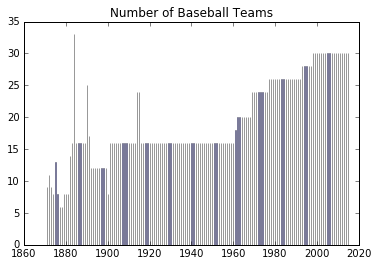

In [3]:
%pylab inline

colname='name'
col_df = team_df.groupby(['yearID'])[colname].count()

#left, height, width=0.8, bottom=None, hold=None, data=None, **kwargs
w = .1
plt.bar(left = col_df.index.values, height = col_df, width=w, alpha=.4)
plt.title( "Number of Baseball Teams")
plt.show()

## Question 2: Has attendance been increasing over time?

Average attendance per a game in every year is in increasing trend. Around 15000 spectators came to a game on average since 2000. However, the attendance is widely distributed from 10,000 to 25,000 by each team.

There are 297 missing values between the year of 1871 and around 1890.

In [4]:
def total_points(x_lab, y_lab):
    x = team_df[x_lab]
    y = team_df[y_lab]/team_df["G"]
    
    b= team_df.groupby(x_lab)[y_lab,"G"].sum()
    new_lab="Average "+y_lab
    b[new_lab] = b[y_lab]/b["G"]
    #print b
    plt.scatter(x, y,  linestyle=":", alpha=.1, color='b' )
    plt.plot( b[new_lab], color='r')
    plt.ylabel(features_dict[y_lab]+ ' per game')
    plt.xlabel(features_dict[x_lab])
    plt.title("Trend of Attendace over time")
    plt.legend()
    
    plt.show()

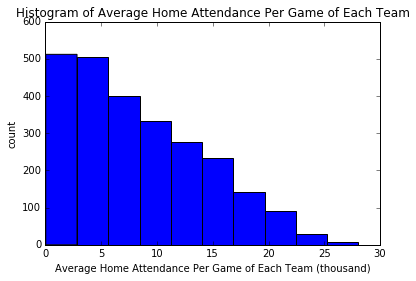

*** Number of missinng values:  279


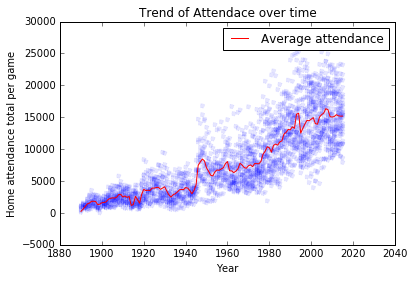

In [5]:
col = "attendance"

#finding missing values
null_idx = team_df[col].isnull()
null_cnt = sum(null_idx) 

#removed rows with missing value for histogram
a = team_df[col][-null_idx]
#print a
b=a/team_df["G"][-null_idx]/1000
plt.hist(b, bins = 10)
xlab = "Average Home Attendance Per Game of Each Team"
plt.xlabel(xlab+" (thousand)")
plt.ylabel("count")
plt.title("Histogram of "+xlab)

plt.show()

print "*** Number of missinng values: ", null_cnt

total_points("yearID", "attendance")

## Question 3: Which features are mostly correlated to attendance? (Since 2000)

Here we explore which features are highly related to attendance by computing Pearson R value between a feature and "attendance." The result shows that more time a team wins the more spectators come, and vice versa as expected: Features related to "win" such as rank, number of wins, run scored, number of saves, number of hits have postive correlation with attendance, other features related to "lose" have negative relaionship with attendance.

### Exloring and cleaning data

Here we took data recorded only from 2000 to 2015. This is because, first, there are no missing data and outliers since 2000. Also, it would be more interesting to see charateristics of recent period to have insight to have more spectators for teams.

In addition, since each team had different number of games by year, entire features are scaled by dividing by the total numbers of games they had in a given year.

Features besides numbers of completed games, shutouts, wins and loses are normally distributed as presented in the histograms below.

In [6]:
## feature lists to exclude from computing correlation relationship
feature_win = ["WSWin", "DivWin", "LgWin", "WCWin"]
ids = [feature for feature in features_dict.keys() if "ID" in feature and 'year' not in feature]
ids.extend(['name','park'])
time = ['yearID', 'decade']
#score_realted_label = ["ER","ERA", "RA","L", "CG", "SA","SV","R"]
label = ["Rank","attendance", "G"]

print sum([len(feature_win), len(ids), len(time), len(label)])

to_exclude = []

to_exclude.extend(feature_win+ids +time+label) #+score_realted_label)    

to_include=[col for col in team_df.columns if col not in to_exclude]

year_idx = team_df["yearID"]>=2000   #year_idx = team_df["yearID"].apply(lambda x: x in range(1950,2000))
features = team_df[to_include][year_idx]
labels = team_df[label][year_idx]

print "to_include: ",to_include

### scaling with number of completed games for each row
idx = labels["G"]>0
features = features[idx]
features_scaled = features[idx]*0
labels = labels[idx]
#print labels["attendance"]
print features.shape, features_scaled.shape

for row in range(features.shape[0]):
    features_scaled.iloc[row,:] = features.iloc[row,:]/(labels['G'].iloc[row])
    labels["attendance"].iloc[row]= float(labels["attendance"].iloc[row])/(labels['G'].iloc[row])

features_scaled["Rank"] = labels["Rank"]    
#print features_scaled.describe()
#print features.head(2)
#Counter(labels) 

18
to_include:  ['Ghome', 'W', 'L', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP', 'BPF', 'PPF']
(480, 31) (480, 31)


C:\Program Files\Anaconda2\lib\site-packages\pandas\core\indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Histograms of values by each feature recorded since 2000


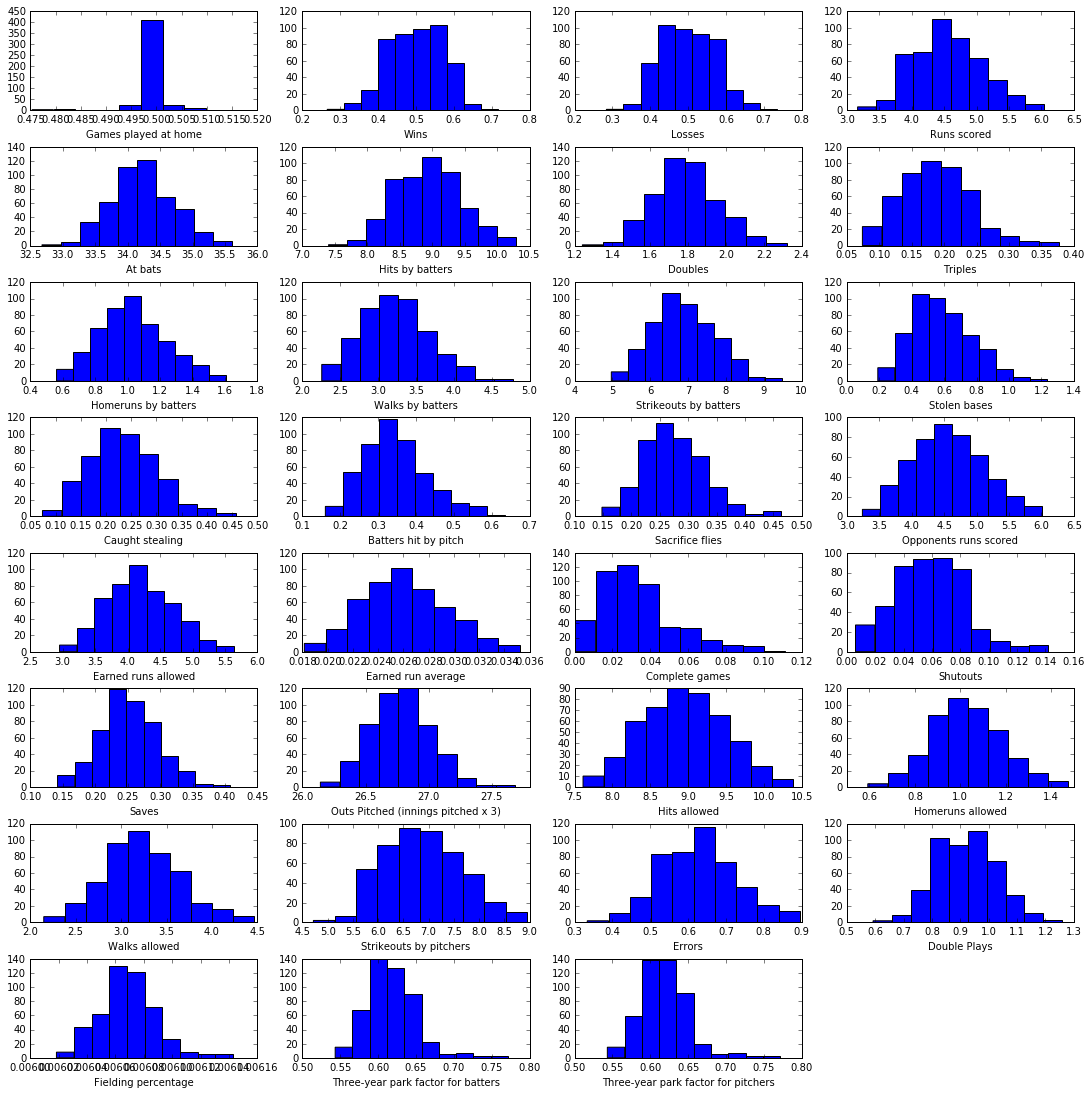

In [7]:
def histogram(col):
    plt.hist(feature_scaled[col])
    plt.xlabel(features_dict[col])
    plt.ylabel("count")
    plt.title("Histogram of "+features_dict[col])
    plt.show


axisNum = 1
plt.figure(figsize=(15,15))
plt.title("Histograms of features")
for feature in to_include:
    ncol = 4
    nrow = len(to_include)/ncol+1
    ax = plt.subplot(nrow, ncol, axisNum)
    plt.hist(features_scaled[feature])
    ax.set_xlabel(features_dict[feature])
    #ax.set_ylabel("count")
    #ax.set_title("Histogram of "+features_dict[col])
    axisNum+=1
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=.5)

print "Histograms of values by each feature recorded since 2000"
plt.show()


### Computing Pearson R value

In [8]:
# Caluclating PearsonR correlation metric between features and W("win rate")

from scipy.stats import pearsonr

p_r_values=[]
colnames = features_scaled.columns

for idx, colname in enumerate(colnames):
    x = features_scaled[colname]
    y = labels["attendance"]
    p_r, p_val = pearsonr(x, y)
    p_r_values.append(p_r)

print
for idx, val in sorted(enumerate(p_r_values), key= lambda x: x[1], reverse =True):
    print "%s - %s, pearson_r: %.4f" %(colnames[idx], features_dict[colnames[idx]], val)


W - Wins, pearson_r: 0.4791
R - Runs scored, pearson_r: 0.2941
SV - Saves, pearson_r: 0.2801
H - Hits by batters, pearson_r: 0.2789
SOA - Strikeouts by pitchers, pearson_r: 0.2562
BB - Walks by batters, pearson_r: 0.2146
SHO - Shutouts, pearson_r: 0.2138
HR - Homeruns by batters, pearson_r: 0.1973
IPouts - Outs Pitched (innings pitched x 3), pearson_r: 0.1948
FP - Fielding percentage, pearson_r: 0.1584
AB - At bats, pearson_r: 0.1464
SF - Sacrifice flies, pearson_r: 0.1187
Ghome - Games played at home, pearson_r: 0.1059
BPF - Three-year park factor for batters, pearson_r: 0.0944
2B - Doubles, pearson_r: 0.0524
HBP - Batters hit by pitch, pearson_r: 0.0486
PPF - Three-year park factor for pitchers, pearson_r: -0.0016
SB - Stolen bases, pearson_r: -0.0027
CG - Complete games, pearson_r: -0.0105
3B - Triples, pearson_r: -0.0234
CS - Caught stealing, pearson_r: -0.1180
HRA - Homeruns allowed, pearson_r: -0.1733
SO - Strikeouts by batters, pearson_r: -0.1824
BBA - Walks allowed, pearson_r:

## Conclusion

In this analysis, we learned that the number of attendance are highly correlated with performance of the team which would seems natural. So, we might get more interesting insight if we have additional features not related to teams' performance such as information about events or promotion held by the team or weather information etc.